<a href="https://colab.research.google.com/github/akhilesh0090/Titanic-Survival-Prediction-Analyzing-Historical-Data-to-Predict-Passenger-Survival/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [211]:
train =pd.read_csv('/content/train.csv')
test =pd.read_csv('/content/test.csv')
t=pd.read_csv('/content/gender_submission.csv')

In [213]:
t.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [215]:
t=t.drop('PassengerId', axis=1)

In [219]:
y_val=t
y_val

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [212]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

<Axes: xlabel='Sex', ylabel='Survived'>

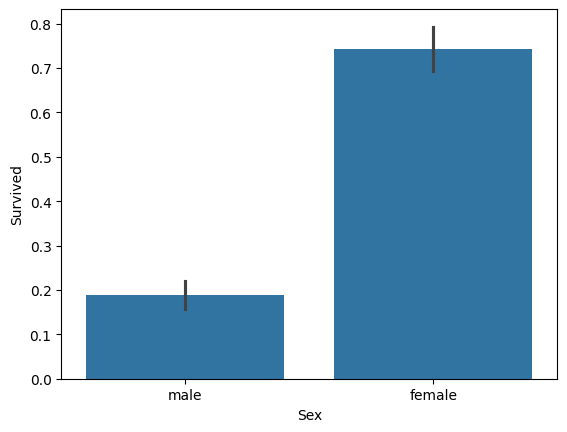

In [134]:
sns.barplot(x='Sex', y='Survived', data=train)

### Percentage of male and female who Survived


In [135]:
train['Survived'][train['Sex']== 'female'].value_counts(normalize= True)[1]*100

74.20382165605095

In [136]:
train['Survived'][train['Sex']== 'male'].value_counts(normalize= True)[1]*100

18.890814558058924

### Survival on based of class of people

<Axes: xlabel='Pclass', ylabel='Survived'>

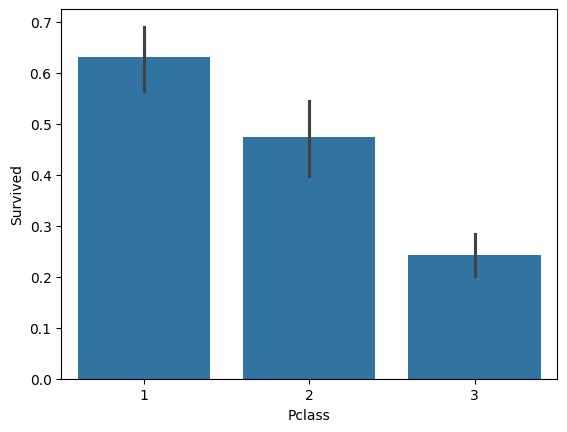

In [137]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [138]:
train['Survived'][train['Pclass']== 1].value_counts(normalize= True)[1]*100

62.96296296296296

In [139]:
train['Survived'][train['Pclass']== 2].value_counts(normalize= True)[1]*100

47.28260869565217

In [140]:
train['Survived'][train['Pclass']== 3].value_counts(normalize= True)[1]*100

24.236252545824847

### Filling null values

In [141]:
train.Age=train.Age.fillna(-0.5)
test.Age=test.Age.fillna(-0.5)

In [142]:
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child', 'Teenager','Student','Young Adult', 'Adult','Senior']

<function matplotlib.pyplot.show(close=None, block=None)>

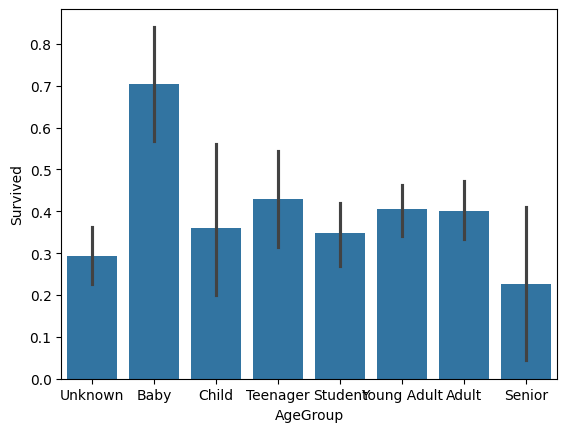

In [143]:
train['AgeGroup']=pd.cut(train['Age'],bins,labels= labels)
test['AgeGroup']=pd.cut(test['Age'],bins,labels= labels)
sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.show

In [144]:
train=train.drop(['Ticket','Cabin','Fare'], axis=1)
test=test.drop(['Ticket','Cabin','Fare'], axis=1)

In [145]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult


**Dealing with missing values**

In [146]:
queen=train[train['Embarked']=='Q'].shape[0]
print(queen)

77


In [147]:
south=train[train['Embarked']=='S'].shape[0]
print(south)

644


In [148]:
cher=train[train['Embarked']=='C'].shape[0]
print(cher)

168


In [149]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
AgeGroup       0
dtype: int64

In [150]:
train=train.fillna({'Embarked': 'S'})

In [152]:
combine = [train, test]
for d in combine:
    d['Title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [154]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,Mr


In [155]:
for d in combine:
  d['Title']=d['Title'].replace(['Lady', 'Capt', 'Col','Countess','Rev','Don', 'Dona','Dr','Jonkheer','Major'],'Rare')
  d['Title']=d['Title'].replace(['Countess','Lady','Sir'],'Royal')
  d['Title']=d['Title'].replace('Mlle','Miss')
  d['Title']=d['Title'].replace('Ms','Miss')
  d['Title']=d['Title'].replace('Mme','Mrs')

train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,Royal,1.000000


In [156]:
title_mapping={'Mr':1,'Miss':2, 'Mrs':3,'Master':4,'Royal': 5, 'Rare':6}

In [157]:
for  d in combine:
  d['Title']=d['Title'].map(title_mapping)
  d['Title']=d['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [158]:
mr_age=train[train['Title'] == 1]['AgeGroup'].mode()
miss_age=train[train['Title'] == 2]['AgeGroup'].mode()
mrs_age=train[train['Title'] == 3]['AgeGroup'].mode()
master_age=train[train['Title'] == 4]['AgeGroup'].mode()
royal_age=train[train['Title'] == 5]['AgeGroup'].mode()
rare_age=train[train['Title'] == 6]['AgeGroup'].mode()


age_title_map={1 :'Young Adult', 2 : 'Student', 3 : 'Adult', 4 : 'Baby', 5 : 'Adult', 6 : 'Adult'}

for i in range(len(train['AgeGroup'])):
  if train['AgeGroup'][i] == 'Unknown':
    train['AgeGroup'][i]= age_title_map[train['Title'][i]]
for i in range(len(test['AgeGroup'])):
  if test['AgeGroup'][i] == 'Unknown':
    test['AgeGroup'][i]= age_title_map[test['Title'][i]]

In [159]:
train.AgeGroup.unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' <
                         'Senior']

In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


### Label Encoding

In [162]:

le = LabelEncoder()
transform = ['Sex', 'AgeGroup', 'Embarked']

for i in transform:
    train[i] = le.fit_transform(train[i])


In [163]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


In [164]:
for i in transform:
    test[i] = le.fit_transform(test[i])

In [165]:
X_train=train.drop(['PassengerId','Name', 'Survived'], axis=1)
Y_train=train['Survived']
X_test=test.drop(['PassengerId','Name'], axis=1)
Y_val=

In [220]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,22.0,1,0,2,4,1
1,1,0,38.0,1,0,0,0,3
2,3,0,26.0,0,0,2,6,2
3,1,0,35.0,1,0,2,6,3
4,3,1,35.0,0,0,2,6,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2,6,6
887,1,0,19.0,0,0,2,4,2
888,3,0,-0.5,1,2,2,4,2
889,1,1,26.0,0,0,0,6,1


In [206]:
Y_train


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [207]:
X_val=X_test
X_val

,Pclass,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,3,1,34.5,0,0,1,6,1
1,3,0,47.0,1,0,2,0,3
2,2,1,62.0,0,0,1,3,1
3,3,1,27.0,0,0,2,6,1
4,3,0,22.0,1,1,2,4,3
...,...,...,...,...,...,...,...,...
413,3,1,-0.5,0,0,2,6,1
414,1,0,39.0,0,0,0,0,6
415,3,1,38.5,0,0,2,0,1
416,3,1,-0.5,0,0,2,6,1


### Logistic Regression and RandomForestClassifier model training and validation

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [221]:
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

RandomForestClassifier Accuracy: 0.8301435406698564
LogisticRegression Accuracy: 0.9569377990430622


### Hyperparameter tuning and cross validation on the best performing model

In [227]:
if best_model.__class__.__name__ == 'LogisticRegression':
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']
    }
else:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    }

grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Model after Hyperparameter Tuning:", best_model)


test_predictions = best_model.predict(X_val)

test['Survived'] = test_predictions
test[['PassengerId', 'Survived']].to_csv('predictions.csv', index=False)

Best Model after Hyperparameter Tuning: LogisticRegression(C=0.1, random_state=42)
